In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from geopy.geocoders import Nominatim
%matplotlib inline

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
df= pd.read_csv('/content/titanic.csv')

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [114]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [130]:
#1.데이터 전처리
#1-1 결측치 찾아보기

train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [129]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [139]:
#1-1. df_train에서 PassengerId, Name, Ticket을 지운다.
#Name과 Ticket에서는 가져올 데이터가 없기 때문이다.
#하지만 이 문제에서 결과물은 PassengerId, Survived 요소가 필요하므로 훈련데이터에서만 PanssengerId를 삭제한다.

# 훈련 데이터
train.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace = True)
# 테스트 데이터
test.drop(["Name", "Ticket"], axis = 1, inplace = True)



KeyError: ignored

In [133]:
#1-2. Age 결측치를 평균값으로 채우는 것으로 해결
age_before = test[test['Age'].isnull()]
mean_age = test['Age'].mean()

test['Age'] = test['Age'].fillna(mean_age)
test[test.index.isin(age_before.index)]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


<Axes: ylabel='Frequency'>

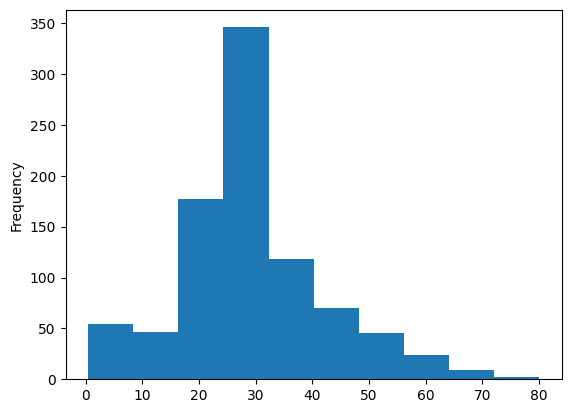

In [124]:
test[test['Age'].isnull()]
test['Age'].plot(kind='hist')


In [126]:
#1-2 embarked 의 결측치
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)


In [127]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
#alive와 survived는 같은 항목이므로 alive 칼럼을 drop한다.
#sex와 who 칼럼으로 성인 남성이 이미 구분되므로 adult_male drop한다.
df=df.drop('alive', axis=1)
df=df.drop('adult_male', axis=1)
df=df.drop("class", axis=1)

In [ ]:
df.head(3)

In [ ]:
print(missing_values)

In [ ]:
#2. 데이터 나누기
import pandas as pd
from sklearn.model_selection import train_test_split


# 생존 여부를 예측하는데 필요한 특성 선택
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']

# 데이터 분할 (80%를 훈련 데이터, 20%를 테스트 데이터로 사용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 분할된 데이터 확인
print("훈련 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)
